**Лабораторная работа №3 студентки группы ИУ5-21М Дьяконовой Светланы**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler,  MinMaxScaler,  RobustScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('hotel_bookings.csv')

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Маштабирование признаков**

In [ ]:
# Нужно ли масштабирование
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# выбор признаков для маштабирования
X_ALL = data[['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'stays_in_weekend_nights']]

In [ ]:
X_ALL.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights
0,0,342,2015,27,0
1,0,737,2015,27,0
2,0,7,2015,27,0
3,0,13,2015,27,0
4,0,14,2015,27,0


In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, data['hotel'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((95512, 5), (23878, 5))

*метод  Z-оценки*

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights
0,-0.76704,2.227051,-1.634768,-0.012141,-0.928890
1,-0.76704,5.923385,-1.634768,-0.012141,-0.928890
2,-0.76704,-0.907814,-1.634768,-0.012141,-0.928890
3,-0.76704,-0.851667,-1.634768,-0.012141,-0.928890
4,-0.76704,-0.842309,-1.634768,-0.012141,-0.928890
...,...,...,...,...,...
119385,-0.76704,-0.758089,1.192195,0.575875,1.073895
119386,-0.76704,-0.018822,1.192195,0.575875,1.073895
119387,-0.76704,-0.655153,1.192195,0.575875,1.073895
119388,-0.76704,0.046682,1.192195,0.575875,1.073895


In [ ]:
data_cs11_scaled.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-1.376344e-13,3.358325e-16,7.194355e-14,4.093983e-15,3.928971e-14
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-7.670405e-01,-9.733187e-01,-1.634768e+00,-1.923191e+00,-9.288904e-01
25%,-7.670405e-01,-8.048782e-01,-2.212864e-01,-8.206620e-01,-9.288904e-01
50%,-7.670405e-01,-3.276301e-01,-2.212864e-01,6.136141e-02,7.250220e-02
75%,1.303712e+00,5.239303e-01,1.192195e+00,7.963809e-01,1.073895e+00
max,1.303712e+00,5.923385e+00,1.192195e+00,1.898910e+00,1.809757e+01


In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

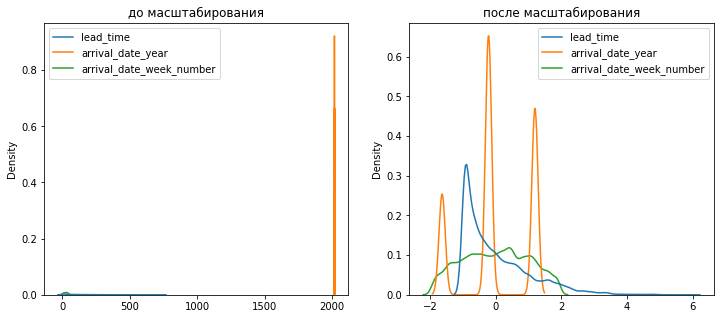

In [ ]:
draw_kde(['lead_time', 'arrival_date_year', 'arrival_date_week_number'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

**Масштабирование по медиане**


In [ ]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,0.246559,0.156554,-0.037947,-0.036201
std,0.482918,0.752557,0.707476,0.618415,0.499307
min,0.000000,-0.485915,-1.000000,-1.227273,-0.500000
25%,0.000000,-0.359155,0.000000,-0.545455,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.640845,1.000000,0.454545,0.500000
max,1.000000,4.704225,1.000000,1.136364,9.000000


In [ ]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

ValueError: ignored

In [ ]:
draw_kde(['lead_time', 'arrival_date_year', 'arrival_date_week_number']], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

SyntaxError: ignored

# **Обработка выбросов для числовых значений**

# **Обработка нестандартного признака**

# **Отбор признаков**